# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Elaine Agustina
- **Email:** mc834d5x1658@student.devacademy.id
- **ID Dicoding:** mc834d5x1658

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penggunaan sepeda pada jam sibuk di musim yang beda dari tahun 2011-2012?
- Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda per jam pada hari kerja dibandingkan dengan akhir pekan/hari libur antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df dan hour_df memiliki kolom yang sama tetapi hour_df memiliki kolom tambahan yaitu kolom hr

### Assessing Data

In [3]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak ada duplikasi (duplicate data)
- tidak terdapat missing value
- tipe data dteday di day_df dan hour_df masih bernilai object

### Cleaning Data

In [4]:
datetime_columns = ["dteday", "dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipe data dteday di day_df dan hour_df diganti dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
merged_df = pd.merge(
    left=hour_df,
    right=day_df[['dteday', 'season', 'weathersit', 'workingday']],
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes=('', '_day')
)

peak_hours = merged_df[merged_df['hr'].isin([7, 8, 9, 17, 18, 19])]
peak_usage_by_season = peak_hours.groupby('season')['cnt'].mean()
print(peak_usage_by_season)


merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])
merged_df = merged_df[(merged_df['dteday'].dt.year >= 2011) & (merged_df['dteday'].dt.year <= 2012)]
merged_df['is_weekend'] = merged_df['workingday'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend/Holiday')
result = merged_df.groupby(['is_weekend', 'weathersit'])['cnt'].mean().reset_index()

print(result)

merged_df.to_csv("merged.csv", index=False)
print("File merged.csv berhasil dibuat dengan kolom:", merged_df.columns)



season
1    194.613173
2    366.048007
3    415.103020
4    346.284230
Name: cnt, dtype: float64
        is_weekend  weathersit         cnt
0          Weekday           1  208.458333
1          Weekday           2  183.005327
2          Weekday           3  112.775000
3          Weekday           4  100.000000
4  Weekend/Holiday           1  197.624702
5  Weekend/Holiday           2  156.675536
6  Weekend/Holiday           3  108.298153
7  Weekend/Holiday           4   23.000000
File merged.csv berhasil dibuat dengan kolom: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_day', 'weathersit_day',
       'workingday_day', 'is_weekend'],
      dtype='object')


**Insight:**
- Rata-rata penyewaan sepeda yang paling tinggi pada season 3 (fall) untuk dari 2011-2012
- Rata-rata dari jumlah sewaan untuk weather '1' selalu tercatat paling paling tinggi dan paling rendah untuk weather '4' untuk weekday maupun weekend
-Rata-rata sepeda yang disewakan pada saat weather '4' di weekend sangat rendah dibanding pada waktu lain yang hanya sebanyak 23

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-10-df91d71b271c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_usage_by_season.index, y=peak_usage_by_season.values, palette=colors)


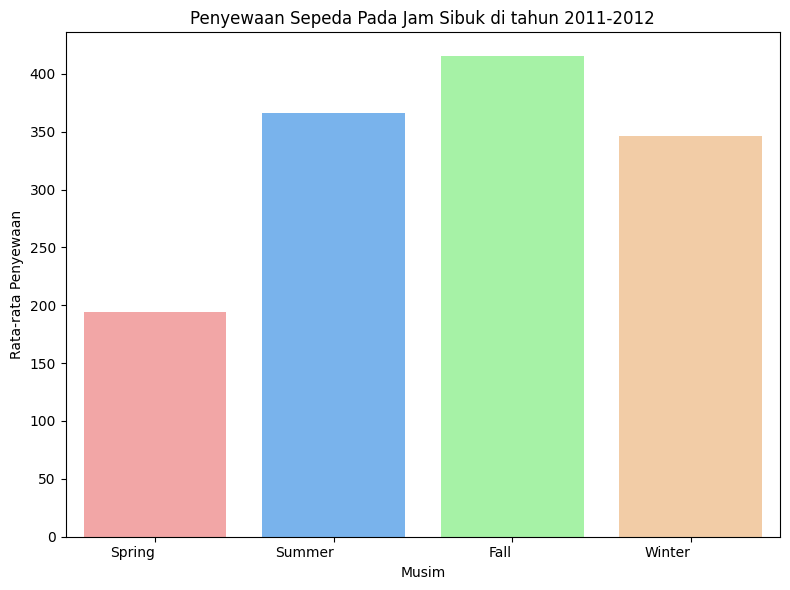

In [10]:
# Pertanyaan 1: Bagaimana pola penggunaan sepeda pada jam sibuk di musim yang beda dari tahun 2011-2012?

season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

peak_usage_by_season.index = peak_usage_by_season.index.map(season_mapping)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
plt.figure(figsize=(8, 6))
sns.barplot(x=peak_usage_by_season.index, y=peak_usage_by_season.values, palette=colors)
plt.title('Penyewaan Sepeda Pada Jam Sibuk di tahun 2011-2012')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

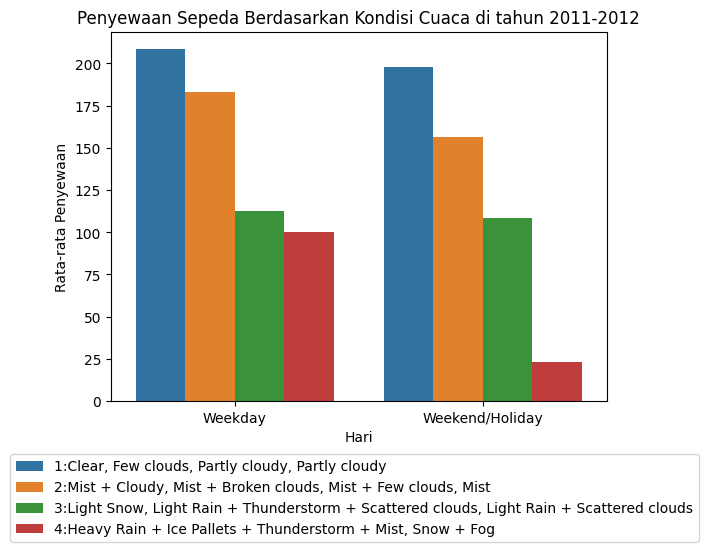

In [12]:
# Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda per jam pada hari kerja dibandingkan dengan akhir pekan/hari libur antara tahun 2011 dan 2012?



def format_weathersit(weathersit_value):
    if weathersit_value == 1:
        return "1:Clear, Few clouds, Partly cloudy, Partly cloudy"
    elif weathersit_value == 2:
        return "2:Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
    elif weathersit_value == 3:
        return "3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
    elif weathersit_value == 4:
        return "4:Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
    else:
        return str(weathersit_value)

result['weathersit'] = result['weathersit'].apply(format_weathersit)

sns.barplot(x='is_weekend', y='cnt', hue='weathersit', data=result)
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca di tahun 2011-2012')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=[label.split(': ')[1] if ': ' in label else label for label in labels], title=None, loc='lower right', bbox_to_anchor=(1.2, -0.4))

plt.show()

**Insight:**
- Pertanyaan 1:
  - Terlihat bahwa dari bar plot bahwa rata-rata penyewa sepeda pada jam sibuk untuk musim fall dari tahun 2011-2012 adalah yang tertinggi yaitu 415. Sedangkan penyewaan sepeda yang paling sedikit pada jam sibuk dalam rentang waktu yang sama ada pada musim spring dengan rata-rata hanya 194.
- Pertanyaan 2:
  - Dapat dilihat bahwa rata-rata sepada yang disewa sewaktu cuaca cerah selalu tercatat paling paling tinggi dan paling rendah pada saat terjadi hujan deras. Statistik ini berlaku untuk hari kerja dan juga akhir pekan/hari libur.
  - Untuk setiap kondisi cuaca , rata-rata penyewaan sepeda pada working day selalu lebih tinggi dibandingkan dengan pada saat weekend/holiday tetapi perbedaannya tidak terlalu signifikan kecuali ketika terdapat hujan deras pada saat weekend/holiday sangatlah rendah yaitu hanya 23.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Untuk periode 2011-2012 pada jam sibuk (peak hours) dengan asumsi: 07:00-09:00 dan 17:00-19:00, sepeda paling sedikit disewa pada musim semi. Tetapi, lambat laun penyewaan sepeda akan terus peningkatan dengan puncaknya pada musim gugur.
- Conclution pertanyaan 2: Kondisi cuaca untuk periode 2011-2012 sangat mempengaruhi permintaan untuk menyewa sepeda. Semakin buruk kondisi cuaca, sepeda yang disewa akan mengalami penurunan.

In [13]:
merged_df.to_csv("merged.csv", index=False)
